In [23]:
import pandas as pd

# Daten laden
df = pd.read_csv(r'C:\Users\donis\Downloads\Toyota_Data.csv') # Path zum Datensatz
df.head()

# 2.1 Zielvariable für Vorhersage definieren
target_variable = 'High'

# 2.2 Statistische Kennwerte
# Statistische Informationen für alle Felder
stats = df.describe()

# Statistische Informationen für "High"
high_stats = df[target_variable].describe()
high_stats

median_values = df.select_dtypes(include=[np.number]).median()

std_values = df.select_dtypes(include=[np.number]).std()


print("Medianwerte:\n", median_values)
print("Standardabweichungen:\n", std_values)


Medianwerte:
 Adj Close       50.583900
Close           66.040001
High            66.650002
Low             65.440002
Open            66.000000
Volume       91000.000000
dtype: float64
Standardabweichungen:
 Adj Close        52.272225
Close            51.295776
High             51.552662
Low              50.976716
Open             55.851523
Volume       387425.599372
dtype: float64


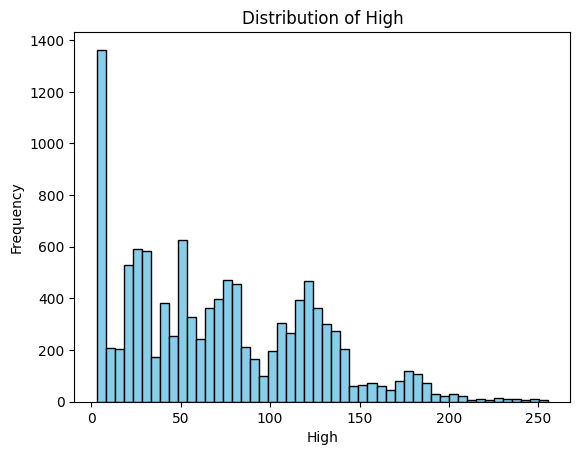

In [21]:
# 2.3 Histogramm des Schlusskurses
import matplotlib.pyplot as plt

# Histogramm für die Zielvariable "High"
plt.hist(df[target_variable], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_variable}')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.show()

In [22]:
# 2.4 Skalierung des Schlusskurses
from sklearn.preprocessing import StandardScaler

# Skalierung der 'Open', 'Low' und 'Close' Felder
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Open', 'Low', 'Close']])

# Erstelle einen DataFrame für die skalierten Werte und benenne die Spalten korrekt
scaled_df = pd.DataFrame(scaled_features, columns=['Open_scaled', 'Low_scaled', 'Close_scaled'])

# Füge die skalierten Spalten zu deinem ursprünglichen DataFrame hinzu
df = pd.concat([df, scaled_df], axis=1)

# Anzeige der ersten paar Zeilen der Daten, einschließlich der skalierten Spalten
display(df[[target_variable, 'Open_scaled', 'Low_scaled', 'Close_scaled']].head())

# 2.4 Begründung
# Argumentation, warum Skalierung möglicherweise nicht sinnvoll ist
print("In diesem speziellen Datensatz, der historische Börsendaten enthält, könnte es jedoch sein, dass die Skalierung für einige Modelle wie lineare Regression oder Entscheidungsbäume weniger relevant ist. "
      "Diese Modelle sind weniger empfindlich gegenüber unskalierten Daten, da sie auf der Relation zwischen den Variablen basieren. "
      "Da die Felder wie 'Open', 'Close' und 'High' ähnliche Größenordnungen haben und im Zeitverlauf relativ konsistent sind, könnte die Skalierung in diesem Fall keinen großen Unterschied in der Modellleistung machen. "
      "Daher könnte es in diesem Fall sinnvoll sein, auf die Skalierung zu verzichten.")

,High,Open_scaled,Low_scaled,Close_scaled
0,3.344743,-1.216770,-1.340969,-1.340648
1,3.358122,-1.216770,-1.340707,-1.340387
2,3.304606,-1.157599,-1.340707,-1.340387
3,3.358122,-1.216770,-1.340707,-1.340387
4,3.438396,-1.216770,-1.339132,-1.338822


In diesem speziellen Datensatz, der historische Börsendaten enthält, könnte es jedoch sein, dass die Skalierung für einige Modelle wie lineare Regression oder Entscheidungsbäume weniger relevant ist. Diese Modelle sind weniger empfindlich gegenüber unskalierten Daten, da sie auf der Relation zwischen den Variablen basieren. Da die Felder wie 'Open', 'Close' und 'High' ähnliche Größenordnungen haben und im Zeitverlauf relativ konsistent sind, könnte die Skalierung in diesem Fall keinen großen Unterschied in der Modellleistung machen. Daher könnte es in diesem Fall sinnvoll sein, auf die Skalierung zu verzichten.
